<a href="https://colab.research.google.com/github/nathanhogshead/AMD-Stock-Prediction/blob/main/AMD_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/nathanhogshead/AMD-Stock-Prediction/main/AMD.xlsx"
xls = pd.ExcelFile(url, engine="openpyxl")

data = pd.read_excel(xls)
print(data.head())

        Date   Open   High    Low  Close   Adj Close     Volume
0 2022-07-11  77.85  78.29  75.84   76.95       76.95  76150300
1 2022-07-12  76.98  77.44  74.43   76.36       76.36  77873200
2 2022-07-13  74.94  79.11  74.48   77.52       77.52  79355000
3 2022-07-14  78.23  79.25  76.00   78.60       78.60  83493600
4 2022-07-15  79.36  81.20  77.90   81.11       81.11  76050600


In [2]:
import datetime
data.columns = data.columns.str.replace('\xa0', '', regex=False).str.strip()
data['Date'] = pd.to_datetime(data['Date'])

ts = data.set_index('Date')['Adj Close']
ts.head()

,Adj Close
Date,
2022-07-11,76.95
2022-07-12,76.36
2022-07-13,77.52
2022-07-14,78.60
2022-07-15,81.11


Text(0, 0.5, 'Adj Close of AMD')

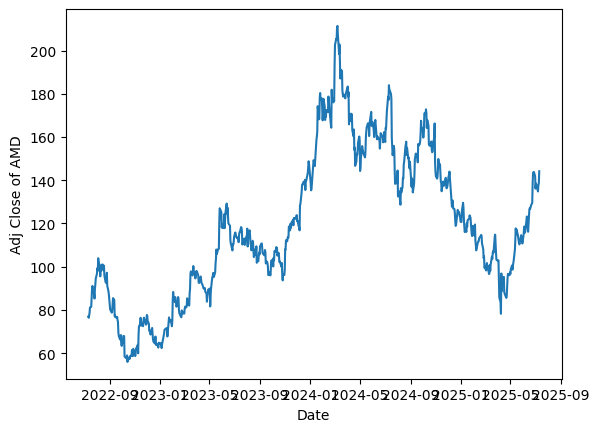

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import sklearn
import seaborn as sns

sns.lineplot(ts)
plt.ylabel("Adj Close of AMD")

Based on the eye, the time series plot of AMD stock from July 11, 2022 to July 11, 2025 is not stationary. The variance seems more or less constant, but there is clearly a mean trend here.